In [10]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sriva\Downloads\train.csv')
df.head()
df.info()
df = df.drop(columns='Customer Name')
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)
df['Year']=df['Order ID'].apply(lambda x:x.split('-')[1])
df
df['Month'] = df['Order Date'].str[3:5]
df['Month'] = df['Month'].astype('int32')
df
years = df.groupby('Year').sum()
years

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales,Month
Year,,,,
2015,9508700,110842145.0,479856.2081,15351
2016,9948341,108836271.0,459436.0054,16378
2017,12254092,138178437.0,600192.5500,19606
2018,16313767,183213700.0,722052.0192,25286


In [3]:
new_df = df.loc[(df['Year'] == '2018')]
new_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
12,13,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,2018,4
23,24,US-2018-156909,16/07/2018,18/07/2018,Second Class,SF-20065,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2018,7
34,35,CA-2018-107727,19/10/2018,23/10/2018,Second Class,MA-17560,Home Office,United States,Houston,Texas,77095.0,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,2018,10
41,42,CA-2018-120999,10/09/2018,15/09/2018,Standard Class,LC-16930,Corporate,United States,Naperville,Illinois,60540.0,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,2018,9
43,44,CA-2018-139619,19/09/2018,23/09/2018,Standard Class,ES-14080,Corporate,United States,Melbourne,Florida,32935.0,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9768,9769,CA-2018-142328,07/12/2018,14/12/2018,Standard Class,TC-21535,Home Office,United States,San Francisco,California,94122.0,West,OFF-PA-10000380,Office Supplies,Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",50.040,2018,12
9787,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.332,2018,3
9788,9789,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558,2018,3
9789,9790,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Consumer,United States,Houston,Texas,77070.0,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992,2018,3


<BarContainer object of 12 artists>

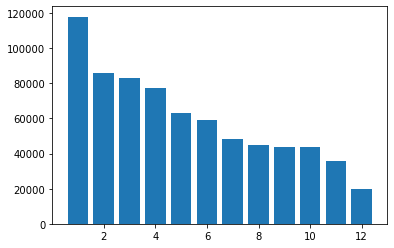

In [6]:
results = new_df.groupby('Month').sum()
results= results.sort_values('Sales', ascending = False)
results
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['Sales'])

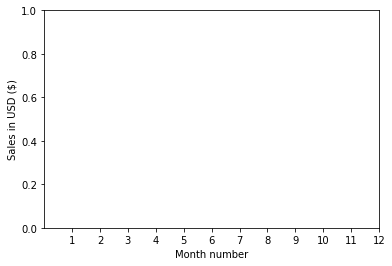

,Row ID,Postal Code,Sales,Month
Product Name,,,,
Canon imageCLASS 2200 Advanced Copier,14969,127850.0,35699.898,24
Martin Yale Chadless Opener Electric Letter Opener,16473,235666.0,11825.902,25
GBC DocuBind TL300 Electric Binding System,25376,152770.0,10943.278,39
Hewlett Packard LaserJet 3310 Copier,22654,273623.0,9239.846,25
Samsung Galaxy Mega 6.3,19957,159546.0,9239.780,31
Cubify CubeX 3D Printer Triple Head Print,684,27217.0,7999.980,11
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,17017,233571.0,7371.742,30
HON 5400 Series Task Chairs for Big and Tall,15481,51350.0,7220.094,13
GBC DocuBind P400 Electric Binding System,9450,76418.0,7077.148,11


In [8]:
#adding x,y labels
plt.xticks(months) 
plt.ylabel('Sales in USD ($)') 
plt.xlabel('Month number') 
plt.show()
sales_df = new_df.groupby('State').sum() 
sales_df
new_df
product_sold = new_df.groupby('Product Name').sum()
product_sold= product_sold.sort_values('Sales', ascending = False)
product_sold.head(15)